In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df=pd.read_csv(r"A:\Work Docs\DATA Set\placement ML Day-42.csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
354,6.73,23.0,1
968,6.84,26.0,0
203,7.93,52.0,0
951,7.52,48.0,1
413,6.65,28.0,1


C:\Users\acz\AppData\Local\Temp\ipykernel_12136\533513279.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],hist=False)
C:\Users\acz\AppData\Local\Temp\ipykernel_12136\533513279.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'],hist=Fal

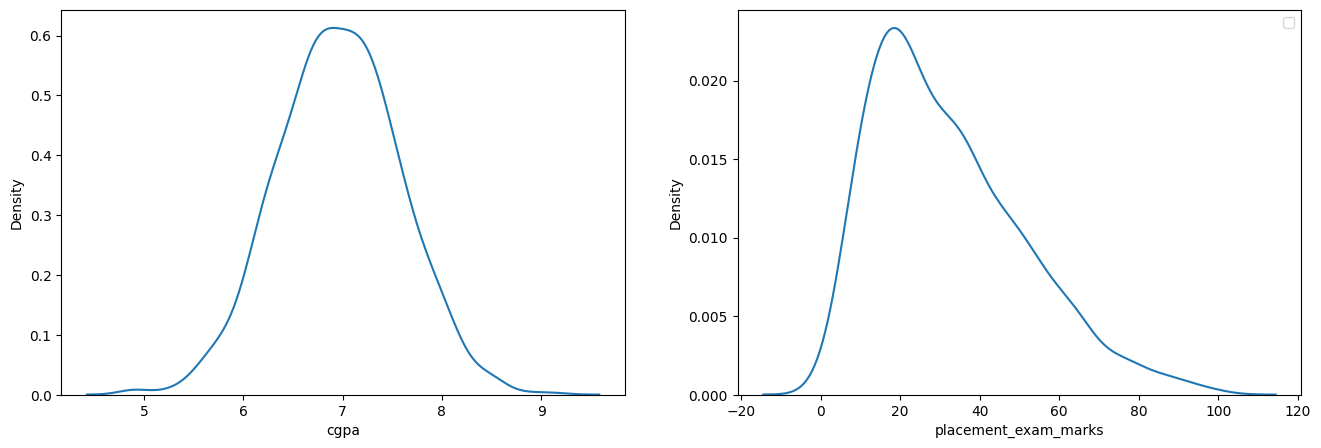

In [3]:
plt.figure(figsize=((16,5)))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'],hist=False)

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'],hist=False)

plt.legend()
plt.show()

From distributionplot we can see that CGPA is standard distribution while Marks is Skewed. Hence Z-Score can only be applied to CGPA Values

In [4]:
print('Mean values of cgpa',df['cgpa'].mean())
print('std values of cgpa',df['cgpa'].std())

print('min values of cgpa',df['cgpa'].min())
print('Max values of cgpa',df['cgpa'].max())




Mean values of cgpa 6.96124
std values of cgpa 0.6158978751323896
min values of cgpa 4.89
Max values of cgpa 9.12


In [5]:
#Find Boundry values 
print('Highest allowed: ', df['cgpa'].mean()+3*df['cgpa'].std())
print('Lowest allowed: ', df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed:  8.808933625397168
Lowest allowed:  5.113546374602832


In [6]:
# Finding Outliers
df[(df['cgpa']>8.8) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming


### Approach-1, Without Zscore

In [7]:
new_df=df[(df['cgpa']>5.11) & (df['cgpa']<8.80)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### Approach-2, With Zscore

In [8]:
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [9]:
new_df=df[(df['cgpa_zscore']<3)&(df['cgpa_zscore']>-3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [10]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()

lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

In [11]:
upper_limit

8.808933625397168

In [12]:
lower_limit

5.113546374602832

In [13]:
# np.where(x,y,z)
# x=Condition
# y=Value if Condition is true
# z=value if Condition is False

In [14]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [15]:
df.shape

(1000, 4)

In [16]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.465494e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00
